# 1. Importing required Libraries

In [318]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# 2. Loading the Data

In [319]:
path_tr = "data/train.csv"
path_te = "data/test.csv"

In [320]:
train = pd.read_csv(path_tr)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [321]:
print(train.shape)
print(train.columns.to_list())

(891, 12)
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [322]:
test = pd.read_csv(path_te)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [323]:
print(test.shape)
print(test.columns.to_list())

(418, 11)
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [324]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [325]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [326]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [327]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# 3. Data Cleaning

Dropping PassengerId and Ticket

In [328]:
# train.drop(['PassengerId','Ticket'], axis=1, inplace=True)
train.drop(['Ticket'], axis=1, inplace=True)

Removing Null Data

In [329]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [330]:
train.isnull().sum() / train.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

* Cabin has 687 null values which is 77.10%.
* Age has 177 null values which is 19.87%.
* Embarked has 2 null values which is 0.22%.

In [331]:
test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [332]:
(test.isnull().sum() / test.shape[0] *100).sort_values(ascending=False)

Cabin          78.229665
Age            20.574163
Fare            0.239234
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Embarked        0.000000
dtype: float64

* Cabin has 327 null values which is 78.23%.
* Age has 86 null values which is 20.57%.
* Fare has 1 null values which is 0.24%

How many people Survived as per train data?

In [333]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

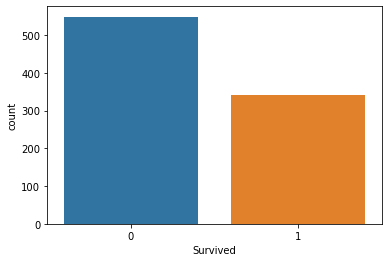

In [334]:
sns.countplot(x='Survived', data=train)

549 died and 342 people survived.

Gender vs Survived

In [335]:
male = train[train['Sex']=='male']
female = train[train['Sex']=='female']

Text(0.5, 1.0, 'Male')

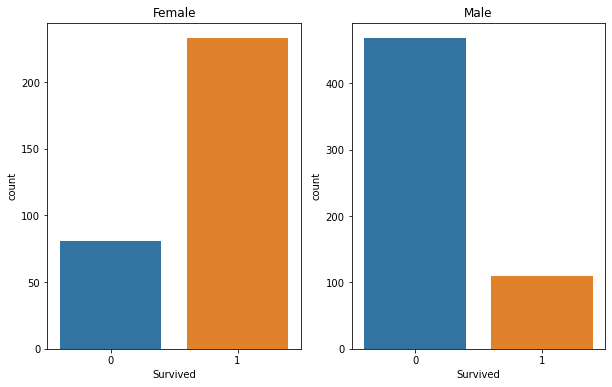

In [336]:
fig=plt.figure(figsize=(10,6))
fig.add_subplot(121)
sns.countplot(x='Survived', data=female)
plt.title('Female')
fig.add_subplot(122)
sns.countplot(x='Survived', data=male)
plt.title('Male')

Females survived more than Males

Imputing Names with Titles

In [337]:
train['Name'] = train['Name'].map(lambda a: a.split(',')[1].split('.')[0].strip())
titles = train['Name'].unique()
titles

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [338]:
train['Name'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Name, dtype: int64

In [339]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,Mrs,female,38.0,1,0,71.2833,C85,C
2,3,1,3,Miss,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,Mrs,female,35.0,1,0,53.1000,C123,S
4,5,0,3,Mr,male,35.0,0,0,8.0500,NaN,S


Imputing Null Values Train Data

In [340]:
medians = dict()
for title in titles:
    medians[title] = train[train['Name']==title]['Age'].dropna().median()    
    # print(title,':',medians)
medians


{'Mr': 30.0,
 'Mrs': 35.0,
 'Miss': 21.0,
 'Master': 3.5,
 'Don': 40.0,
 'Rev': 46.5,
 'Dr': 46.5,
 'Mme': 24.0,
 'Ms': 28.0,
 'Major': 48.5,
 'Lady': 48.0,
 'Sir': 49.0,
 'Mlle': 24.0,
 'Col': 58.0,
 'Capt': 70.0,
 'the Countess': 33.0,
 'Jonkheer': 38.0}

In [341]:
train[train['Age'].isnull()].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
5,6,0,3,Mr,male,NaN,0,0,8.4583,NaN,Q
17,18,1,2,Mr,male,NaN,0,0,13.0000,NaN,S
19,20,1,3,Mrs,female,NaN,0,0,7.2250,NaN,C
26,27,0,3,Mr,male,NaN,0,0,7.2250,NaN,C
28,29,1,3,Miss,female,NaN,0,0,7.8792,NaN,Q
29,30,0,3,Mr,male,NaN,0,0,7.8958,NaN,S
31,32,1,1,Mrs,female,NaN,1,0,146.5208,B78,C
32,33,1,3,Miss,female,NaN,0,0,7.7500,NaN,Q
36,37,1,3,Mr,male,NaN,0,0,7.2292,NaN,C
42,43,0,3,Mr,male,NaN,0,0,7.8958,NaN,C


In [342]:
for i, row in train.iterrows():
    train['Age'] = train['Age'].fillna(medians.get(row['Name']))
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,Mrs,female,38.0,1,0,71.2833,C85,C
2,3,1,3,Miss,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,Mrs,female,35.0,1,0,53.1000,C123,S
4,5,0,3,Mr,male,35.0,0,0,8.0500,NaN,S
5,6,0,3,Mr,male,30.0,0,0,8.4583,NaN,Q
6,7,0,1,Mr,male,54.0,0,0,51.8625,E46,S
7,8,0,3,Master,male,2.0,3,1,21.0750,NaN,S
8,9,1,3,Mrs,female,27.0,0,2,11.1333,NaN,S
9,10,1,2,Mrs,female,14.0,1,0,30.0708,NaN,C


In [343]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have imputed null values in Age with corresponding median values according to the titles in name

Imputing Embarked

In [344]:
emb_list = train['Embarked'].dropna().unique()
print(emb_list.size)
emb_list

3


array(['S', 'C', 'Q'], dtype=object)

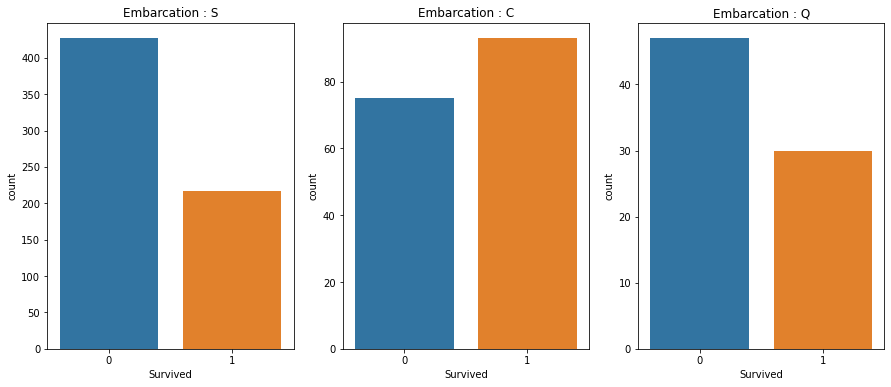

In [345]:
fig = plt.figure(figsize=(15,6))
i=1
for emb in emb_list:    
    fig.add_subplot(1,emb_list.size,i)
    pltTitle = "Embarcation : "+emb
    plt.title(pltTitle)
    sns.countplot(x='Survived', data=train[train['Embarked']==emb])
    i+=1

In [346]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [347]:
train['Embarked'].mode()[0]

'S'

In [348]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].dropna().mode()[0])
print(train['Embarked'].value_counts())

S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [349]:
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         0
dtype: int64


Imputing Cabin column

In [350]:
train['Cabin'].fillna('U',inplace=True)

In [351]:
train['Cabin'].isnull().sum()

0

In [352]:
train['Cabin'] = train['Cabin'].map(lambda x: x[0])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,7.2500,U,S
1,2,1,1,Mrs,female,38.0,1,0,71.2833,C,C
2,3,1,3,Miss,female,26.0,0,0,7.9250,U,S
3,4,1,1,Mrs,female,35.0,1,0,53.1000,C,S
4,5,0,3,Mr,male,35.0,0,0,8.0500,U,S


In [353]:
cabins = train['Cabin'].unique()
cabins

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

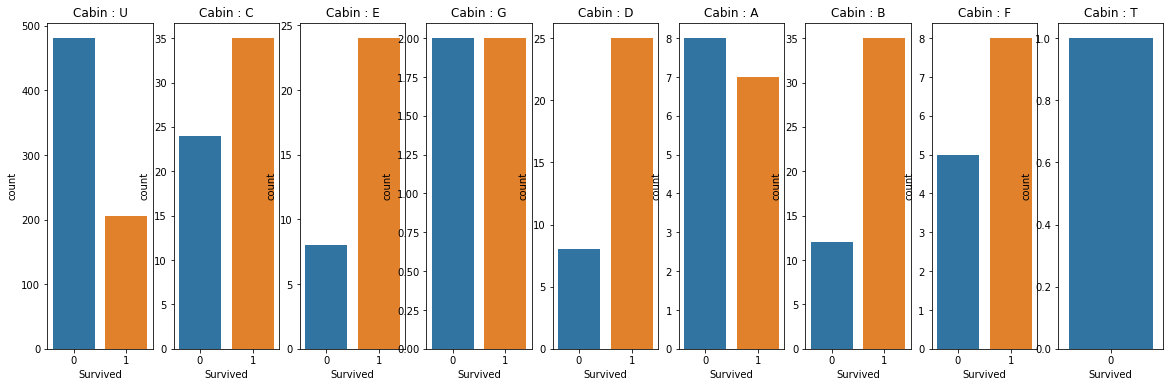

In [354]:
fig = plt.figure(figsize=(20,6))
fig.tight_layout()
i=1
for cabin in cabins:    
    fig.add_subplot(1,cabins.size,i)    
    pltTitle = "Cabin : "+cabin
    plt.title(pltTitle)
    sns.countplot(x='Survived', data=train[train['Cabin']==cabin])
    i+=1

In [355]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Test Data Cleaning

In [356]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Dropping PassengerId and Ticket

In [357]:
# test.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)
test.drop(['Ticket'], axis=1, inplace=True)

In [358]:
test.isnull().sum().sort_values()

PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Embarked         0
Fare             1
Age             86
Cabin          327
dtype: int64

Name - Extracting Titles

In [359]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S


In [360]:
test['Name'] = test['Name'].map(lambda a: a.split(',')[1].split('.')[0].strip())
test['Name'].replace(['Dona'],['Don'],inplace=True)
titles = test['Name'].unique()
titles

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Don'],
      dtype=object)

Imputing Age with Median value as per Title

In [361]:
medians_t = dict()
for title in titles:
    medians_t[title] = test[test['Name']==title]['Age'].dropna().median()
medians_t

{'Mr': 28.5,
 'Mrs': 36.5,
 'Miss': 22.0,
 'Master': 7.0,
 'Ms': nan,
 'Col': 50.0,
 'Rev': 35.5,
 'Dr': 53.0,
 'Don': 39.0}

In [362]:
for i,row in test.iterrows():
    test['Age'] = test['Age'].fillna(medians_t.get(row['Name']))
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,Mr,male,34.5,0,0,7.8292,NaN,Q
1,893,3,Mrs,female,47.0,1,0,7.0000,NaN,S
2,894,2,Mr,male,62.0,0,0,9.6875,NaN,Q
3,895,3,Mr,male,27.0,0,0,8.6625,NaN,S
4,896,3,Mrs,female,22.0,1,1,12.2875,NaN,S


In [363]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Imputing Cabin and setting first letter of Cabin

In [364]:
test['Cabin'].fillna('U',inplace=True)

In [365]:
test['Cabin'] = test['Cabin'].map(lambda x: x[0])
test['Cabin'].value_counts()

U    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin, dtype: int64

Imputing Fare with median value as per Cabin

In [366]:
cabins = test['Cabin'].unique()
cabins

array(['U', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [367]:
fare_medians_t = dict()
for cabin in cabins:
    fare_medians_t[cabin] = test[test['Cabin']==cabin]['Fare'].dropna().median()
fare_medians_t

{'U': 11.5,
 'B': 87.88335000000001,
 'E': 83.1583,
 'A': 30.5,
 'C': 90.0,
 'D': 39.4,
 'F': 11.75,
 'G': 16.7}

In [368]:
for j, row in test.iterrows():
    test['Fare'] = test['Fare'].fillna(fare_medians_t.get(row['Cabin']))

In [369]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [370]:
test['Fare'].describe()

count    418.000000
mean      35.569468
std       55.852969
min        0.000000
25%        7.895800
50%       14.454200
75%       31.471875
max      512.329200
Name: Fare, dtype: float64

In [371]:
print(test.isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64


# 4. Exploratory Data Analysis (EDA)

In [372]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [373]:
num_tr = train.select_dtypes(include=[np.float64, np.int64])
num_tr_cols = num_tr.columns.to_list()
print(num_tr_cols)
cat_tr = train.select_dtypes(include=[np.object])
cat_tr_cols = cat_tr.columns.to_list()
print(cat_tr_cols)

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Name', 'Sex', 'Cabin', 'Embarked']


Univariate Plots

In [374]:
def countPlotter(cols, data):
    for col in cols:
        # print(col)
        len = 7
        wid = 5
        if(train[col].value_counts().shape[0]) > 15:
            len = 25
            wid = 9
        plt.figure(figsize=(len, wid))
        plt.tight_layout()
        sns.countplot(x=col, data=data, palette="bright")

Categorical Features


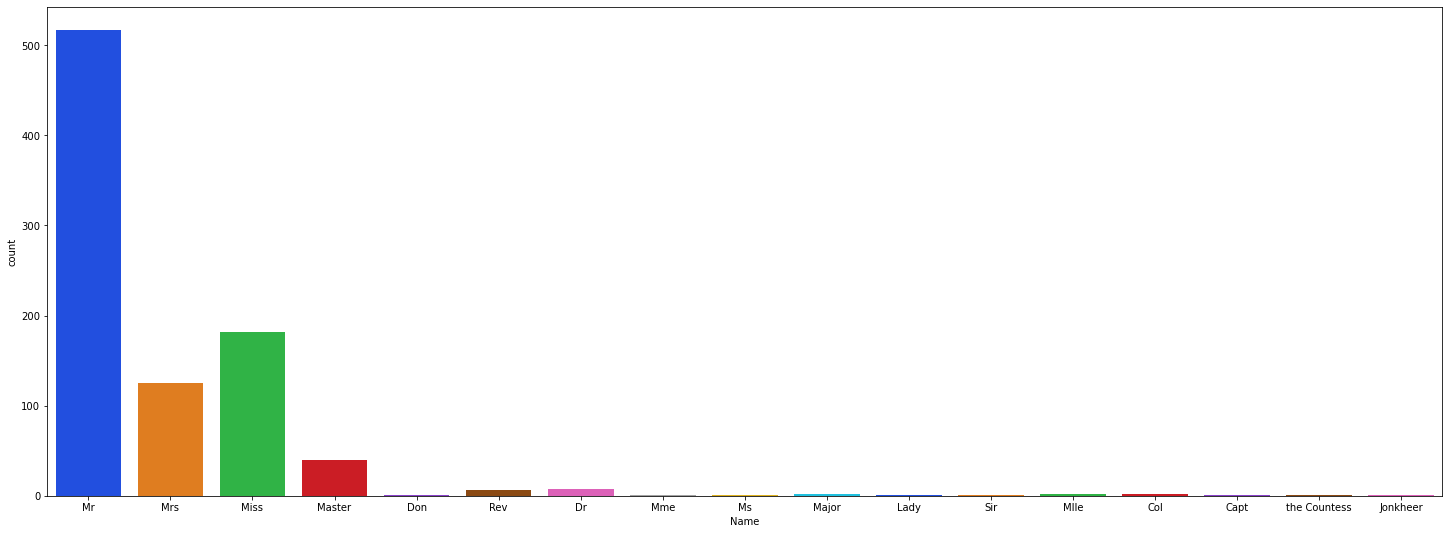

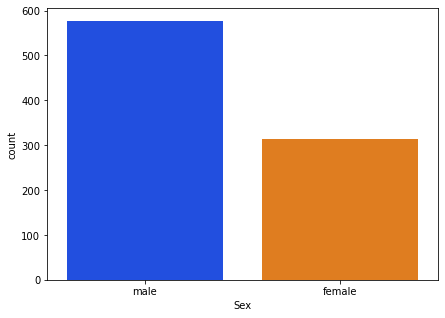

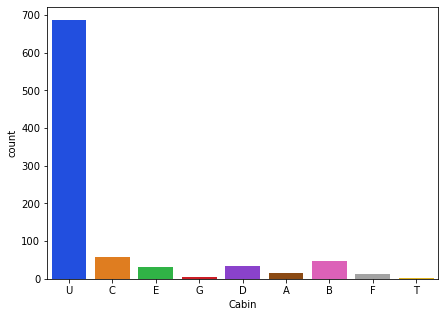

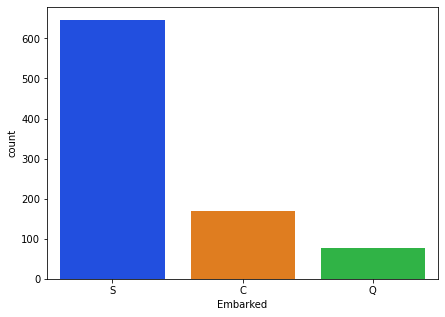

In [375]:
print("Categorical Features")
countPlotter(cat_tr_cols, train)

In [376]:
train['Age'].value_counts().shape

(88,)

In [377]:
train['Embarked'].value_counts().shape

(3,)

Numerical Features


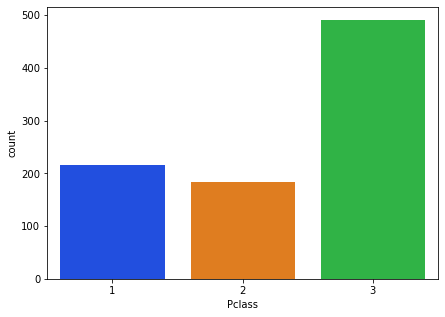

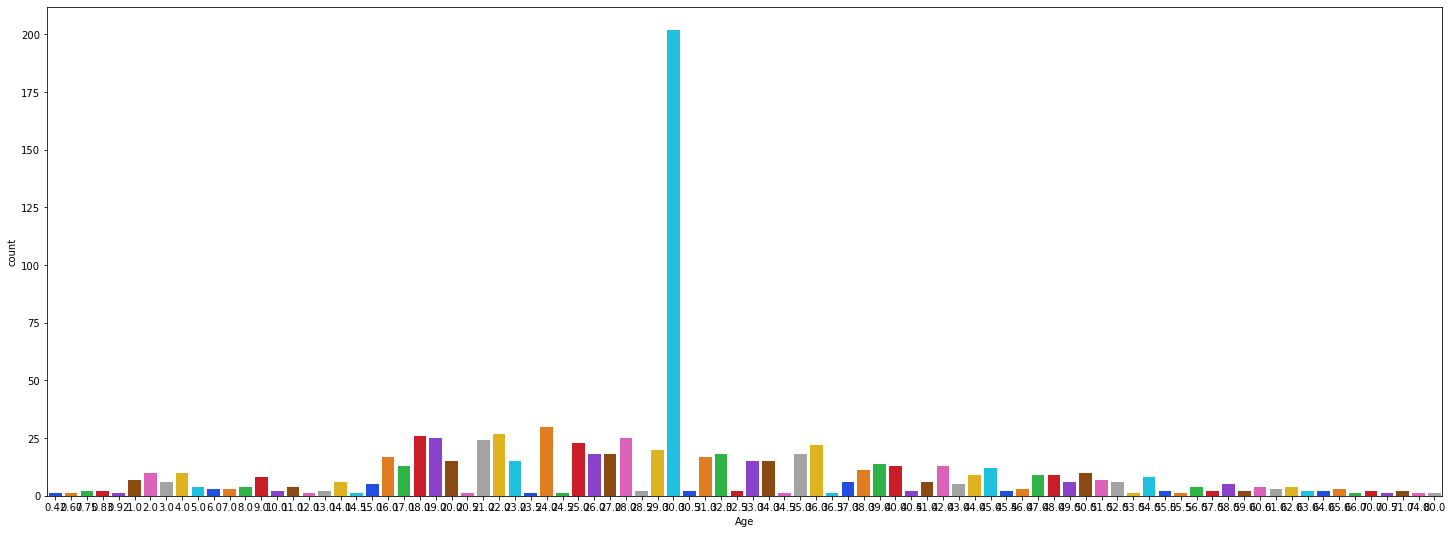

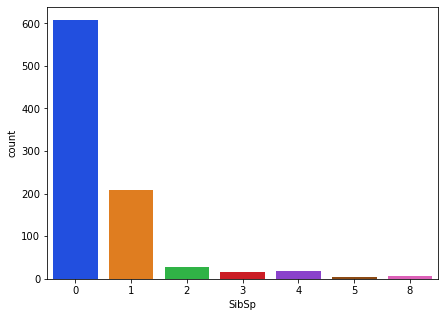

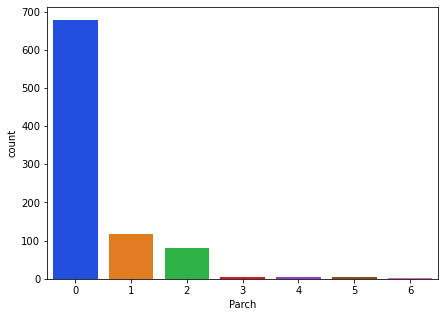

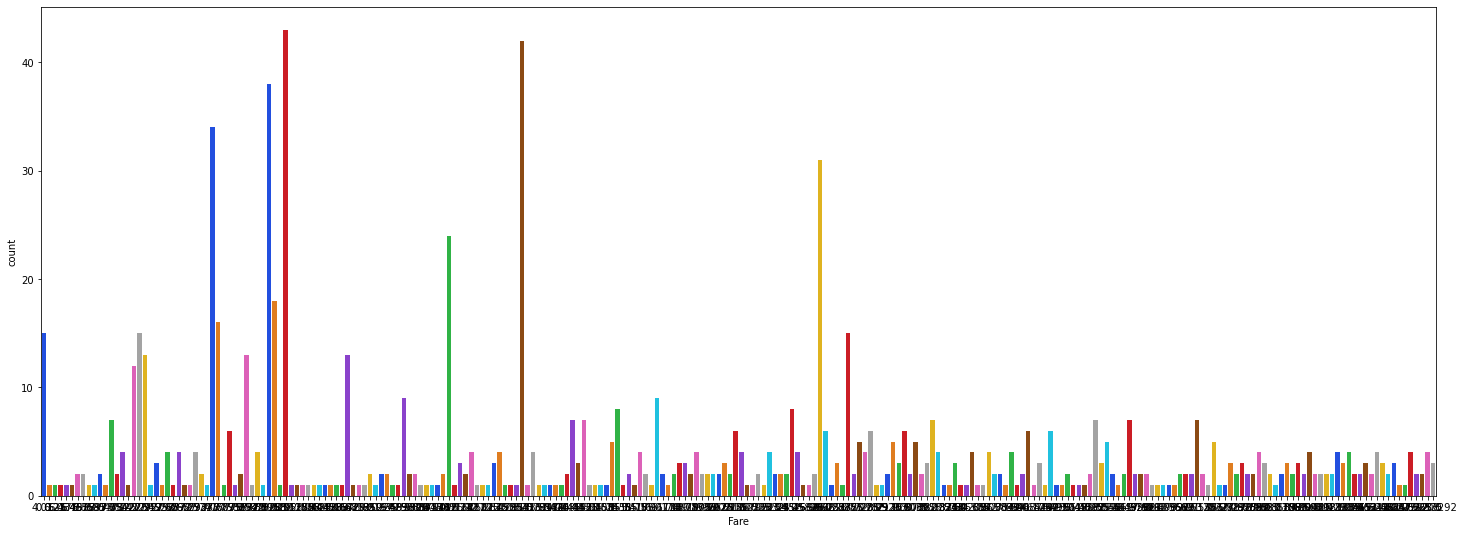

In [378]:
print("Numerical Features")
countPlotter(num_tr_cols[2:], train)

<AxesSubplot:xlabel='Age', ylabel='Count'>

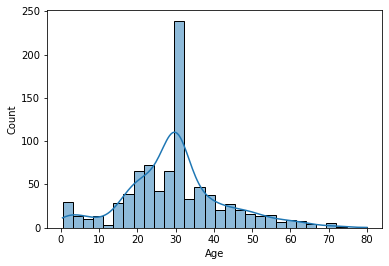

In [379]:
sns.histplot(x='Age', data=train, kde=True)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

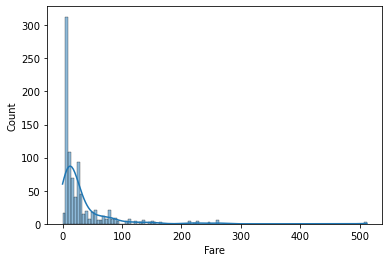

In [380]:
sns.histplot(x='Fare', data=train, kde=True)

Survival vs Features except Ticket

In [381]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033019,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.070657,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.329727,0.083081,0.018443,-0.549500
Age,0.033019,-0.070657,-0.329727,1.000000,-0.232440,-0.180330,0.090632
SibSp,-0.057527,-0.035322,0.083081,-0.232440,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.180330,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.090632,0.159651,0.216225,1.000000


In [382]:
num_tr_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [383]:
cat_tr_cols

['Name', 'Sex', 'Cabin', 'Embarked']

In [384]:
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [385]:
def survivalPlotter(column, data):
    cols = data[column].unique()
    fig = plt.figure(figsize=(20,6))
    fig.tight_layout()
    r=1
    c=5    
    i=1
    for col in cols:    
        # fig.add_subplot(1,cols.size,i)
        fig.add_subplot(r,c,i)
        pltTitle = column+" : "+str(col)
        plt.title(pltTitle)
        sns.countplot(x='Survived', data=train[train[column]==col])        
        i+=1
        if(i==6):
            fig = plt.figure(figsize=(15,6))
            r+=1
            i=1

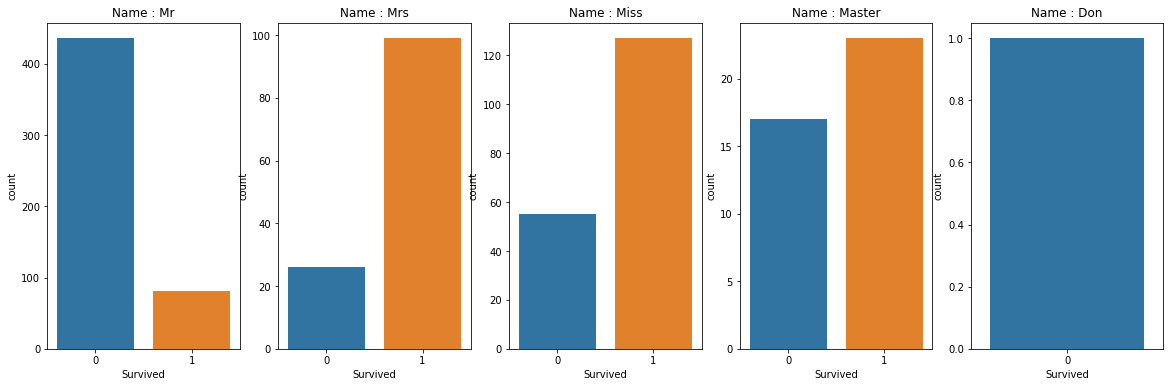

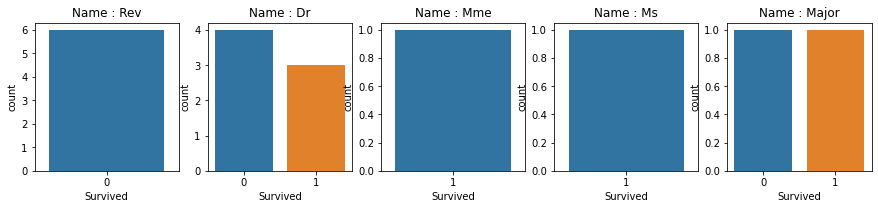

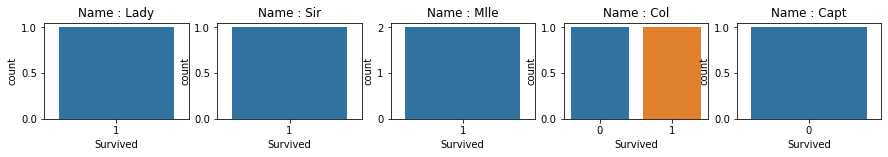

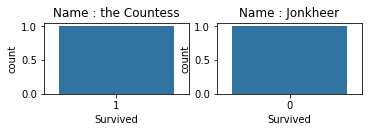

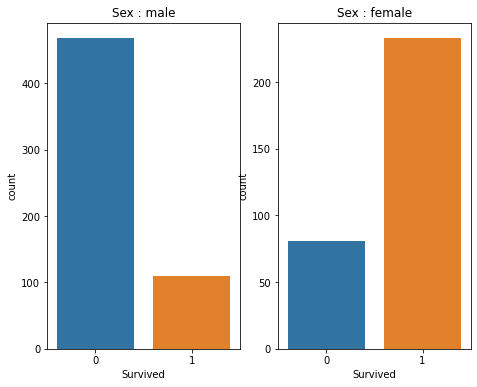

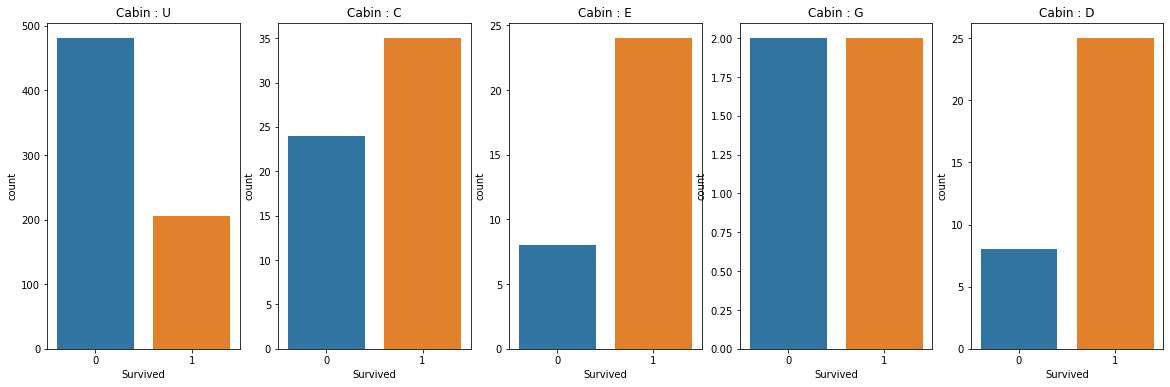

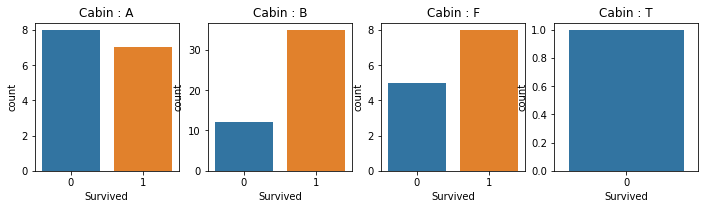

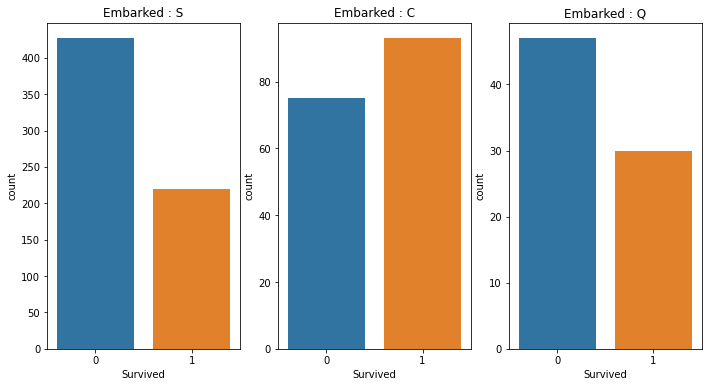

In [386]:
for cat in cat_tr_cols:    
    survivalPlotter(cat, train)

Survived vs Numerical Features

In [387]:
train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 30.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [388]:
num_features = ['Pclass', 'SibSp', 'Parch']

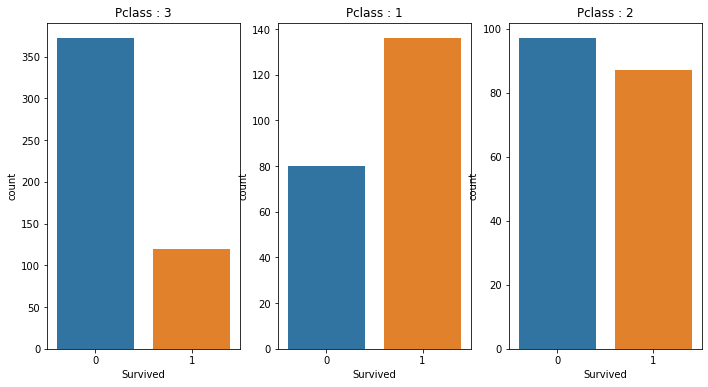

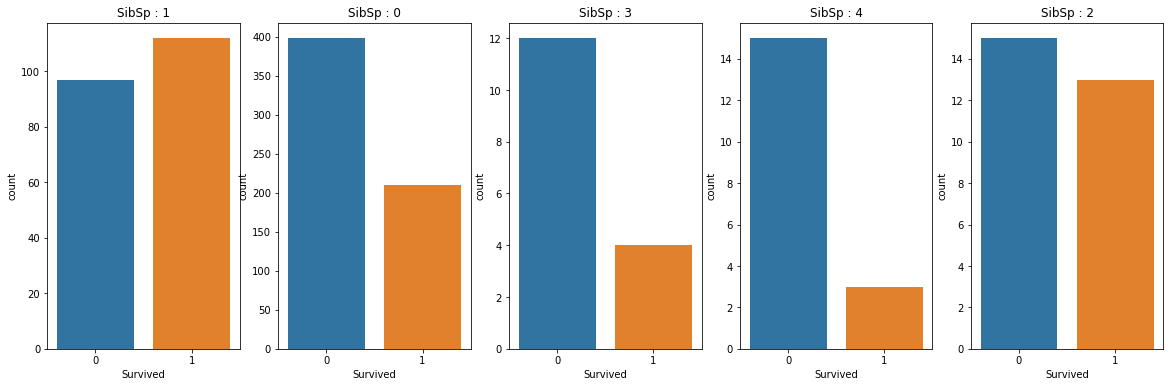

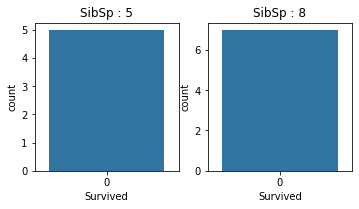

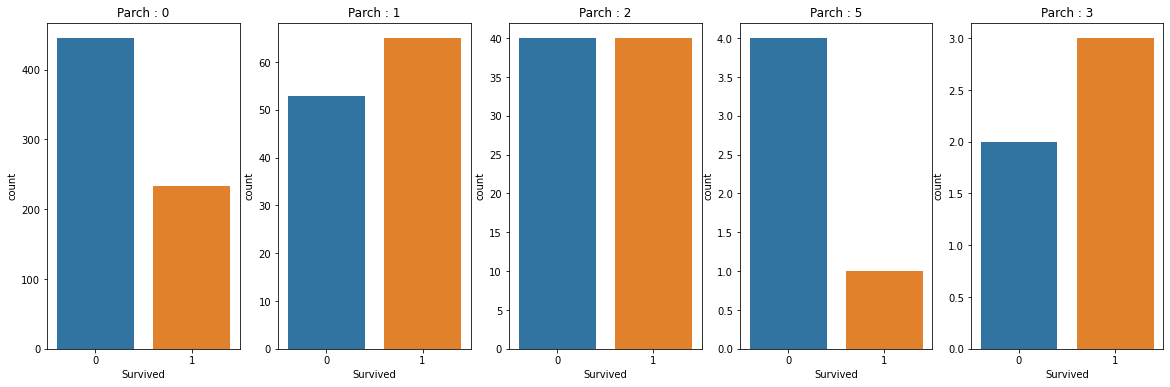

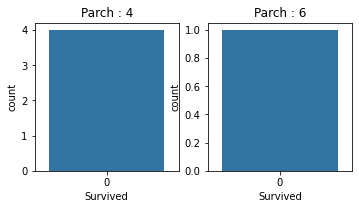

In [389]:
for num_fea in num_features:
    survivalPlotter(num_fea, train)

# 5. Feature Engineering

## StandardScaling columns using Standard Scaler based on survival count

Survival Counter

In [390]:
died = train[train['Survived']==0]
alive = train[train['Survived']==1]

In [391]:
train.shape, died.shape, alive.shape

((891, 11), (549, 11), (342, 11))

In [392]:
print(train['Name'].unique().shape)
train['Name'].unique()

(17,)


array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [393]:
print(died['Name'].unique().shape)
died['Name'].unique()

(11,)


array(['Mr', 'Master', 'Miss', 'Mrs', 'Don', 'Rev', 'Dr', 'Major', 'Col',
       'Capt', 'Jonkheer'], dtype=object)

In [394]:
print(alive['Name'].unique().shape)
alive['Name'].unique()

(13,)


array(['Mrs', 'Miss', 'Mr', 'Master', 'Mme', 'Ms', 'Major', 'Lady', 'Sir',
       'Dr', 'Mlle', 'Col', 'the Countess'], dtype=object)

In [395]:
def survival_counter(col, data):
    sur_df = pd.DataFrame(columns=['Died','Alive'], index=data[col].unique())
    for col_vals in data[col].unique():
        sur_df['Died'] = died[col].value_counts().to_frame('Died').astype('Int64')
        sur_df['Alive'] = alive[col].value_counts().to_frame('Alive').astype('Int64')
    sur_df.fillna(0, inplace=True)
    sur_df['Survival Rate'] = sur_df['Alive']/(sur_df['Died']+sur_df['Alive']) *100
    # display(sur_df)
    return sur_df

In [396]:
cat_tr_cols

['Name', 'Sex', 'Cabin', 'Embarked']

Name - StandardScaler()

In [397]:
survival_counter('Name', train).sort_values('Survival Rate')

,Died,Alive,Survival Rate
Jonkheer,1,0,0.000000
Capt,1,0,0.000000
Rev,6,0,0.000000
Don,1,0,0.000000
Mr,436,81,15.667311
Dr,4,3,42.857143
Major,1,1,50.000000
Col,1,1,50.000000
Master,17,23,57.500000
Miss,55,127,69.780220


In [398]:
name_replace = {
    'Rev': 0,
    'Don': 0,
    'Capt': 0,
    'Jonkheer': 0,
    'Mr': 1,
    'Dr': 2,
    'Major': 3,
    'Col': 3,
    'Master': 4,
    'Miss': 5,
    'Mrs': 6,
    'Mme' : 7,
    'the Countess' : 7,
    'Lady' : 7,
    'Sir' : 7,
    'Mlle' : 7,
    'Ms' : 7    
}

train['Name'] = train['Name'].apply(lambda x: name_replace.get(x))
train['Name'] = StandardScaler().fit_transform(train['Name'].values.reshape(-1,1))

In [399]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,-0.797294,male,22.0,1,0,7.2500,U,S
1,2,1,1,1.537975,female,38.0,1,0,71.2833,C,C
2,3,1,3,1.070922,female,26.0,0,0,7.9250,U,S
3,4,1,1,1.537975,female,35.0,1,0,53.1000,C,S
4,5,0,3,-0.797294,male,35.0,0,0,8.0500,U,S


Cabin - StandardScaler()

In [400]:
survival_counter('Cabin', train).sort_values('Survival Rate')

,Died,Alive,Survival Rate
T,1,0,0.000000
U,481,206,29.985444
A,8,7,46.666667
G,2,2,50.000000
C,24,35,59.322034
F,5,8,61.538462
B,12,35,74.468085
E,8,24,75.000000
D,8,25,75.757576


In [401]:
cabin_replace ={
    'T':0,
    'U':1,
    'A':2,
    'G':3,
    'C':4,
    'F':5,
    'B':6,
    'E':7,
    'D':8
}

train['Cabin'] = train['Cabin'].apply(lambda x: cabin_replace.get(x))
train['Cabin'] = StandardScaler().fit_transform(train['Cabin'].values.reshape(-1,1))
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,-0.797294,male,22.0,1,0,7.2500,-0.494813,S
1,2,1,1,1.537975,female,38.0,1,0,71.2833,0.960231,C
2,3,1,3,1.070922,female,26.0,0,0,7.9250,-0.494813,S
3,4,1,1,1.537975,female,35.0,1,0,53.1000,0.960231,S
4,5,0,3,-0.797294,male,35.0,0,0,8.0500,-0.494813,S


Embarked - StandardScaler()

In [402]:
survival_counter('Embarked', train).sort_values('Survival Rate')

,Died,Alive,Survival Rate
S,427,219,33.900929
Q,47,30,38.961039
C,75,93,55.357143


In [403]:
emb_replace = {
    'S':0,
    'Q':1,
    'C':2
}
train['Embarked'] = train['Embarked'].apply(lambda x: emb_replace.get(x))
train['Embarked'] = StandardScaler().fit_transform(train['Embarked'].values.reshape(-1,1))
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,-0.797294,male,22.0,1,0,7.2500,-0.494813,-0.585954
1,2,1,1,1.537975,female,38.0,1,0,71.2833,0.960231,1.942303
2,3,1,3,1.070922,female,26.0,0,0,7.9250,-0.494813,-0.585954
3,4,1,1,1.537975,female,35.0,1,0,53.1000,0.960231,-0.585954
4,5,0,3,-0.797294,male,35.0,0,0,8.0500,-0.494813,-0.585954


In [404]:
num_tr_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Age - StandardScaler()

In [405]:
train['Age'] = StandardScaler().fit_transform(train['Age'].values.reshape(-1,1))
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,-0.797294,male,-0.597055,1,0,7.2500,-0.494813,-0.585954
1,2,1,1,1.537975,female,0.634162,1,0,71.2833,0.960231,1.942303
2,3,1,3,1.070922,female,-0.289251,0,0,7.9250,-0.494813,-0.585954
3,4,1,1,1.537975,female,0.403309,1,0,53.1000,0.960231,-0.585954
4,5,0,3,-0.797294,male,0.403309,0,0,8.0500,-0.494813,-0.585954


Fare - StandardScaler()

In [406]:
train['Fare'] = StandardScaler().fit_transform(train['Fare'].values.reshape(-1,1))
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,-0.797294,male,-0.597055,1,0,-0.502445,-0.494813,-0.585954
1,2,1,1,1.537975,female,0.634162,1,0,0.786845,0.960231,1.942303
2,3,1,3,1.070922,female,-0.289251,0,0,-0.488854,-0.494813,-0.585954
3,4,1,1,1.537975,female,0.403309,1,0,0.420730,0.960231,-0.585954
4,5,0,3,-0.797294,male,0.403309,0,0,-0.486337,-0.494813,-0.585954


PClass - StandardScaler()

In [407]:
survival_counter('Pclass', train)

,Died,Alive,Survival Rate
3,372,119,24.236253
1,80,136,62.962963
2,97,87,47.282609


In [408]:
train['Pclass'] = StandardScaler().fit_transform(train['Pclass'].values.reshape(-1,1))
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,0.827377,-0.797294,male,-0.597055,1,0,-0.502445,-0.494813,-0.585954
1,2,1,-1.566107,1.537975,female,0.634162,1,0,0.786845,0.960231,1.942303
2,3,1,0.827377,1.070922,female,-0.289251,0,0,-0.488854,-0.494813,-0.585954
3,4,1,-1.566107,1.537975,female,0.403309,1,0,0.420730,0.960231,-0.585954
4,5,0,0.827377,-0.797294,male,0.403309,0,0,-0.486337,-0.494813,-0.585954


Parch - StandardScaler()

In [409]:
survival_counter('Parch', train).sort_values('Survival Rate')

,Died,Alive,Survival Rate
4,4,0,0.000000
6,1,0,0.000000
5,4,1,20.000000
0,445,233,34.365782
2,40,40,50.000000
1,53,65,55.084746
3,2,3,60.000000


In [410]:
# parch_replace = {
#     4:0,
#     6:0,
#     5:1,
#     0:2,
#     2:3,
#     1:4,
#     3:5
# }
# train['Parch'] = train['Parch'].apply(lambda x: parch_replace.get(x))
train['Parch'] = StandardScaler().fit_transform(train['Parch'].values.reshape(-1,1))
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,0.827377,-0.797294,male,-0.597055,1,-0.473674,-0.502445,-0.494813,-0.585954
1,2,1,-1.566107,1.537975,female,0.634162,1,-0.473674,0.786845,0.960231,1.942303
2,3,1,0.827377,1.070922,female,-0.289251,0,-0.473674,-0.488854,-0.494813,-0.585954
3,4,1,-1.566107,1.537975,female,0.403309,1,-0.473674,0.420730,0.960231,-0.585954
4,5,0,0.827377,-0.797294,male,0.403309,0,-0.473674,-0.486337,-0.494813,-0.585954


SibSp - StandardScaler()

In [411]:
survival_counter('SibSp', train).sort_values('Survival Rate')

,Died,Alive,Survival Rate
5,5,0,0.000000
8,7,0,0.000000
4,15,3,16.666667
3,12,4,25.000000
0,398,210,34.539474
2,15,13,46.428571
1,97,112,53.588517


In [412]:
# sibsp_replace = {
#     5:0,
#     8:0,
#     4:1,
#     3:2,
#     0:3,
#     2:4,
#     1:5
# }

# train['SibSp'] = train['SibSp'].apply(lambda x: sibsp_replace.get(x))
train['SibSp'] = StandardScaler().fit_transform(train['SibSp'].values.reshape(-1,1))
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,0.827377,-0.797294,male,-0.597055,0.432793,-0.473674,-0.502445,-0.494813,-0.585954
1,2,1,-1.566107,1.537975,female,0.634162,0.432793,-0.473674,0.786845,0.960231,1.942303
2,3,1,0.827377,1.070922,female,-0.289251,-0.474545,-0.473674,-0.488854,-0.494813,-0.585954
3,4,1,-1.566107,1.537975,female,0.403309,0.432793,-0.473674,0.420730,0.960231,-0.585954
4,5,0,0.827377,-0.797294,male,0.403309,-0.474545,-0.473674,-0.486337,-0.494813,-0.585954


Label Encoding

Sex - Label Encoder

In [413]:
le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])
print(le.classes_)

['female' 'male']


In [414]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,0.827377,-0.797294,1,-0.597055,0.432793,-0.473674,-0.502445,-0.494813,-0.585954
1,2,1,-1.566107,1.537975,0,0.634162,0.432793,-0.473674,0.786845,0.960231,1.942303
2,3,1,0.827377,1.070922,0,-0.289251,-0.474545,-0.473674,-0.488854,-0.494813,-0.585954
3,4,1,-1.566107,1.537975,0,0.403309,0.432793,-0.473674,0.420730,0.960231,-0.585954
4,5,0,0.827377,-0.797294,1,0.403309,-0.474545,-0.473674,-0.486337,-0.494813,-0.585954


Plots for Test Data

In [415]:
num_te = test.select_dtypes(include=[np.float64, np.int64])
num_te_cols = num_te.columns.to_list()
print(num_te_cols)
cat_te = test.select_dtypes(include=[np.object])
cat_te_cols = cat_te.columns.to_list()
print(cat_te_cols)

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Name', 'Sex', 'Cabin', 'Embarked']


Categorical Features


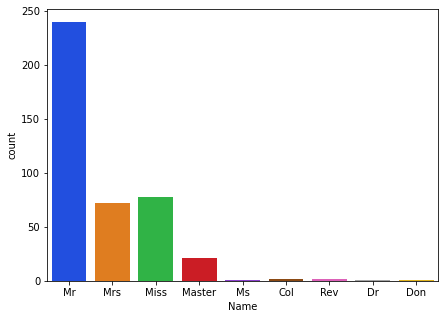

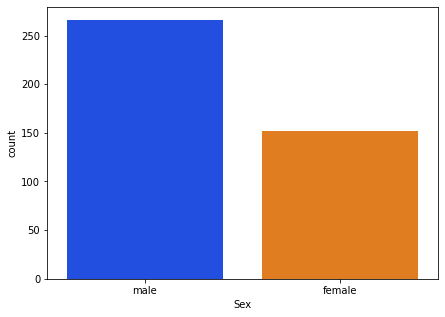

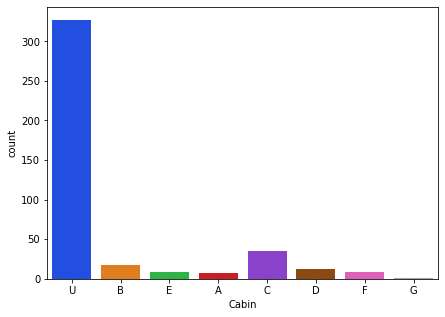

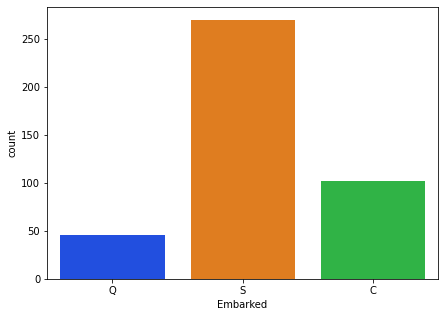

In [416]:
print("Categorical Features")
# countPlotter([cat_te_cols[1], cat_te_cols[4]], test)
countPlotter(cat_te_cols, test)

Numerical Features


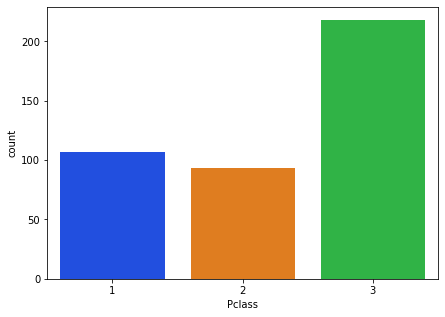

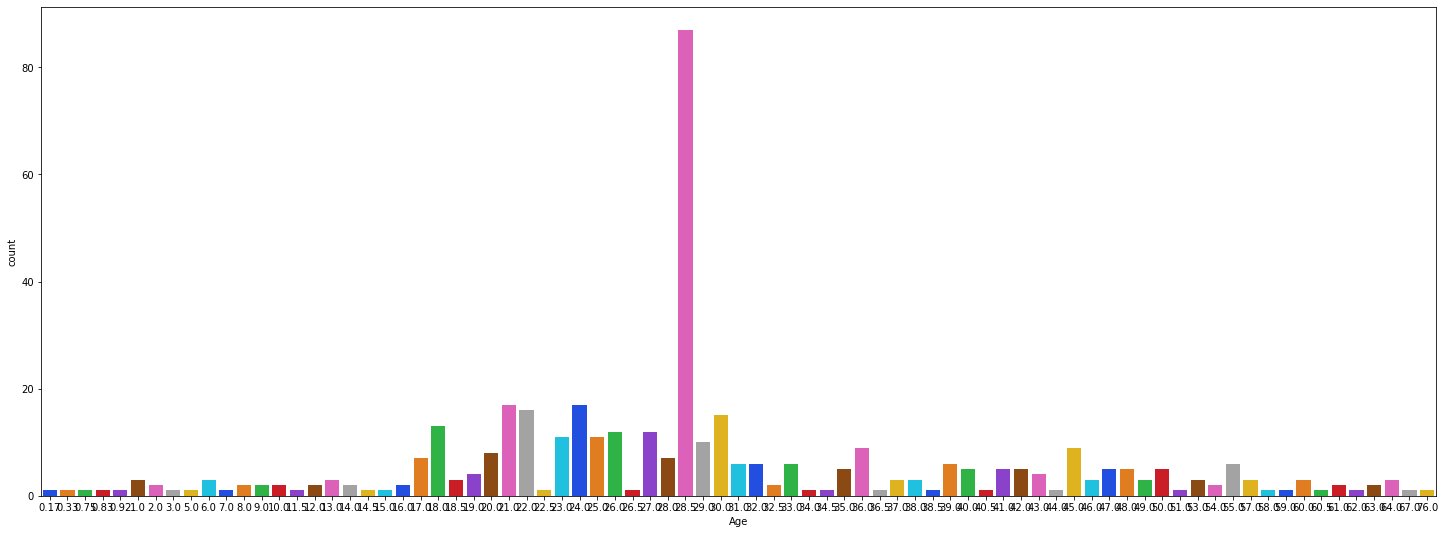

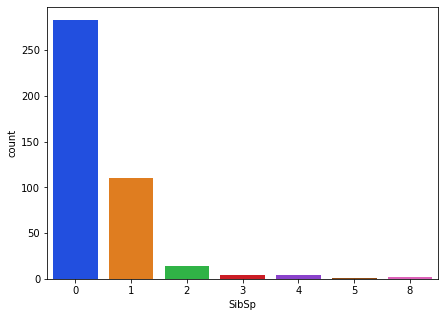

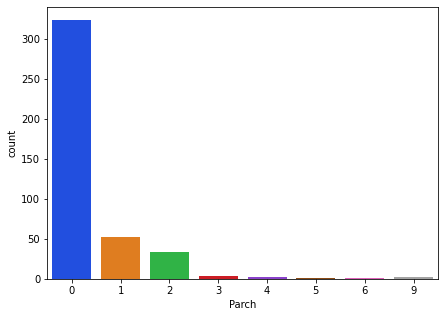

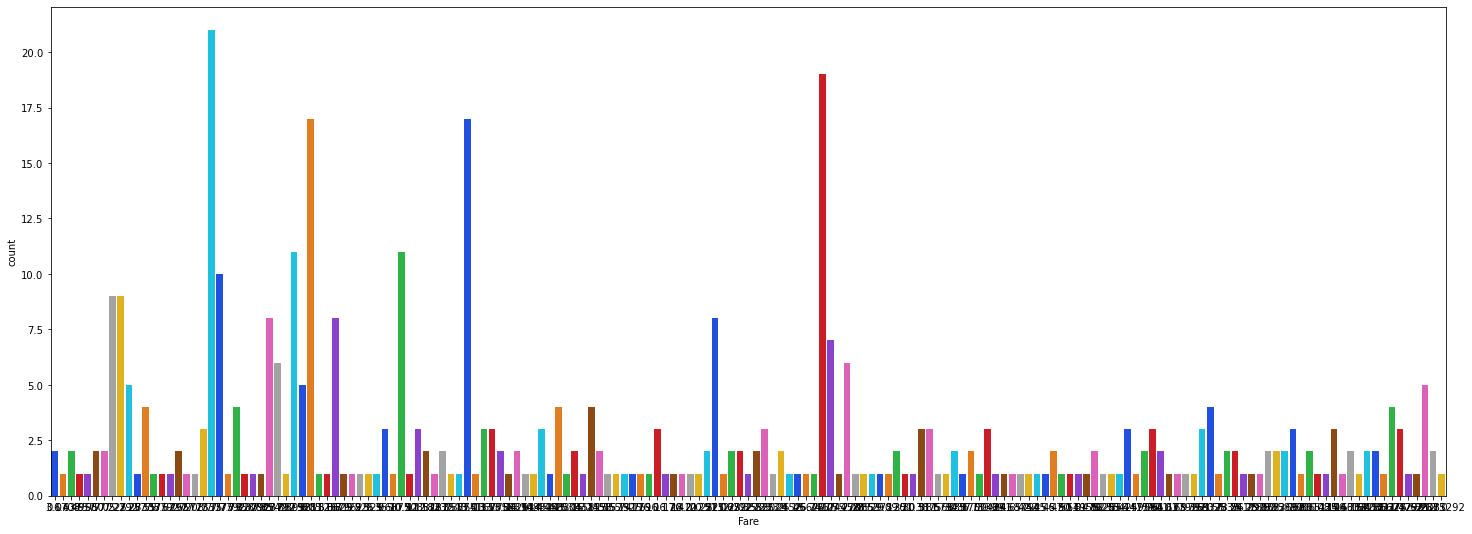

In [417]:
print("Numerical Features")
countPlotter(num_te_cols[1:], test)

<AxesSubplot:xlabel='Age', ylabel='Count'>

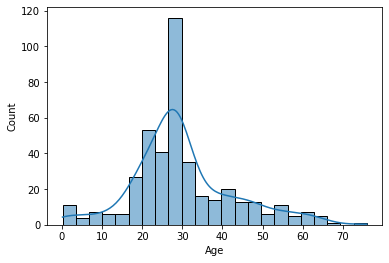

In [418]:
sns.histplot(x='Age', data=test, kde=True)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

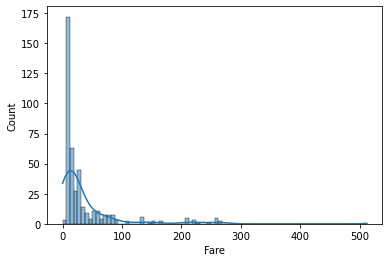

In [419]:
sns.histplot(x='Fare', data=test, kde=True)

## StandardScaler and LabelEncoder - Test Data

In [420]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,Mr,male,34.5,0,0,7.8292,U,Q
1,893,3,Mrs,female,47.0,1,0,7.0000,U,S
2,894,2,Mr,male,62.0,0,0,9.6875,U,Q
3,895,3,Mr,male,27.0,0,0,8.6625,U,S
4,896,3,Mrs,female,22.0,1,1,12.2875,U,S


Name - StandardScaler()

In [421]:
test['Name'] = test['Name'].apply(lambda x: name_replace.get(x))
test['Name'] = StandardScaler().fit_transform(test['Name'].values.reshape(-1,1))

PClass - StandardScaler()

In [422]:
test['Pclass'] = StandardScaler().fit_transform(test['Pclass'].values.reshape(-1,1))

Age - StandardScaler()

In [423]:
test['Age'] = StandardScaler().fit_transform(test['Age'].values.reshape(-1,1))

Fare - StandardScaler()

In [424]:
test['Fare'] = StandardScaler().fit_transform(test['Fare'].values.reshape(-1,1))

Parch - StandardScaler()

In [425]:
# test['Parch'] = test['Parch'].apply(lambda x: parch_replace.get(x))
test['Parch'] = StandardScaler().fit_transform(test['Parch'].values.reshape(-1,1))

SibSp - StandardScaler()

In [426]:
# test['SibSp'] = test['SibSp'].apply(lambda x: sibsp_replace.get(x))
test['SibSp'] = StandardScaler().fit_transform(test['SibSp'].values.reshape(-1,1))

Cabin - StandardScaler()

In [427]:
test['Cabin'] = test['Cabin'].apply(lambda x: cabin_replace.get(x))
test['Cabin'] = StandardScaler().fit_transform(test['Cabin'].values.reshape(-1,1))

Embarked - StandardScaler()

In [428]:
test['Embarked'] = test['Embarked'].apply(lambda x: emb_replace.get(x))
test['Embarked'] = StandardScaler().fit_transform(test['Embarked'].values.reshape(-1,1))

Sex - LabelEncoder()

In [429]:
test['Sex'] = le.fit_transform(test['Sex'])
print(le.classes_)

['female' 'male']


In [430]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,0.873482,-0.819966,1,0.363307,-0.499470,-0.400248,-0.497261,-0.478344,0.470915
1,893,0.873482,1.486533,0,1.352251,0.616992,-0.400248,-0.512125,-0.478344,-0.700767
2,894,-0.315819,-0.819966,1,2.538985,-0.499470,-0.400248,-0.463950,-0.478344,0.470915
3,895,0.873482,-0.819966,1,-0.230060,-0.499470,-0.400248,-0.482324,-0.478344,-0.700767
4,896,0.873482,1.486533,0,-0.625637,0.616992,0.619896,-0.417343,-0.478344,-0.700767


# 6. Machine Learning Model

In [431]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,0.827377,-0.797294,1,-0.597055,0.432793,-0.473674,-0.502445,-0.494813,-0.585954
1,2,1,-1.566107,1.537975,0,0.634162,0.432793,-0.473674,0.786845,0.960231,1.942303
2,3,1,0.827377,1.070922,0,-0.289251,-0.474545,-0.473674,-0.488854,-0.494813,-0.585954
3,4,1,-1.566107,1.537975,0,0.403309,0.432793,-0.473674,0.420730,0.960231,-0.585954
4,5,0,0.827377,-0.797294,1,0.403309,-0.474545,-0.473674,-0.486337,-0.494813,-0.585954


In [432]:
# from sklearn.ensemble import RandomForestClassifier

# y = train["Survived"]

# features = ["Pclass", "Sex", "SibSp", "Parch"]
# X = pd.get_dummies(train[features])
# X_test = pd.get_dummies(test[features])

# model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
# model.fit(X, y)
# predictions = model.predict(X_test)

# y_pred = model.predict(X)
# out = pd.DataFrame({'PassengerId': train.PassengerId, 'Survived_Actual':y, 'Survived_Predicted': y_pred})
# out.to_csv('train_predict.csv', index=False)

# output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
# output.to_csv('submission1.csv', index=False)
# print("Your submission was successfully saved!")

In [433]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [434]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [435]:
y = train['Survived']
X = train.drop(["Survived"], axis=1)

In [436]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0.827377,-0.797294,1,-0.597055,0.432793,-0.473674,-0.502445,-0.494813,-0.585954
1,2,-1.566107,1.537975,0,0.634162,0.432793,-0.473674,0.786845,0.960231,1.942303
2,3,0.827377,1.070922,0,-0.289251,-0.474545,-0.473674,-0.488854,-0.494813,-0.585954
3,4,-1.566107,1.537975,0,0.403309,0.432793,-0.473674,0.420730,0.960231,-0.585954
4,5,0.827377,-0.797294,1,0.403309,-0.474545,-0.473674,-0.486337,-0.494813,-0.585954


In [437]:
X.shape, test.shape

((891, 10), (418, 10))

In [438]:
# 20% of data is set aside for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)

In [439]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 10), (179, 10), (712,), (179,))

In [440]:
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
610,611,0.827377,1.537975,0,0.711113,0.432793,5.732844,-0.018709,-0.494813,-0.585954
91,92,0.827377,-0.797294,1,-0.750957,-0.474545,-0.473674,-0.490280,-0.494813,-0.585954
420,421,0.827377,-0.797294,1,0.018554,-0.474545,-0.473674,-0.489442,-0.494813,1.942303
554,555,0.827377,1.070922,0,-0.597055,-0.474545,-0.473674,-0.491874,-0.494813,-0.585954
10,11,0.827377,1.070922,0,-1.982174,0.432793,0.767630,-0.312172,0.475216,-0.585954


In [441]:
from sklearn.linear_model import LogisticRegression

LogRegModel = LogisticRegression(fit_intercept=True, max_iter=100)

LogRegModel.fit(X_train, y_train)

train_score = LogRegModel.score(X_train, y_train)
test_score = LogRegModel.score(X_test, y_test)

print('Train Score (R-Squared): ',train_score)
print('Test Score (R-Squared): ',test_score)

Train Score (R-Squared):  0.827247191011236
Test Score (R-Squared):  0.8435754189944135


In [442]:
y_predict = LogRegModel.predict(X_test)

In [443]:
#score variables
LR_MAE = round(metrics.mean_absolute_error(y_test, y_predict),2)
LR_MSE = round(metrics.mean_squared_error(y_test, y_predict),2)
LR_R_2 = round(metrics.r2_score(y_test, y_predict),4)
# LR_CS  = round(CVS(LinRegModel, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f" R^2 Score: {LR_R_2}\n")

 Mean Absolute Error: 0.16

 Mean Squared Error: 0.16

 R^2 Score: 0.3656



In [454]:
LogisticRegressionTrainOutput = pd.DataFrame({'Passenger_Id': X_test.PassengerId, 'y_test':y_test, 'prediction':y_predict})
LogisticRegressionTrainOutput.to_csv("Logistic Regression Train.csv")

In [445]:
X_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [446]:
# features = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_0', 'Sex_1', 'Embarked_0', 'Embarked_1', 'Embarked_2']

In [447]:
X.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [448]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [449]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    float64
 2   Name         418 non-null    float64
 3   Sex          418 non-null    int32  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    float64
 6   Parch        418 non-null    float64
 7   Fare         418 non-null    float64
 8   Cabin        418 non-null    float64
 9   Embarked     418 non-null    float64
dtypes: float64(8), int32(1), int64(1)
memory usage: 31.1 KB


In [450]:
print(test.isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [451]:
# test_features = test[features]
submission_predict = LogRegModel.predict(test)

In [452]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,0.873482,-0.819966,1,0.363307,-0.499470,-0.400248,-0.497261,-0.478344,0.470915
1,893,0.873482,1.486533,0,1.352251,0.616992,-0.400248,-0.512125,-0.478344,-0.700767
2,894,-0.315819,-0.819966,1,2.538985,-0.499470,-0.400248,-0.463950,-0.478344,0.470915
3,895,0.873482,-0.819966,1,-0.230060,-0.499470,-0.400248,-0.482324,-0.478344,-0.700767
4,896,0.873482,1.486533,0,-0.625637,0.616992,0.619896,-0.417343,-0.478344,-0.700767


In [453]:
LogisticRegressionTestOutput = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived':submission_predict})
LogisticRegressionTestOutput.to_csv("submission.csv", index=False)